In [1]:
import pandas as pd
import os
import math
from sklearn.model_selection import train_test_split
from sklearn import  preprocessing
import numpy as np

In [3]:
raw_data = pd.read_csv('raw_data.csv')
print(raw_data.shape)
raw_data.describe()

(5287, 13)


,star,lat,long,size,attribute_number,max_guest_number,have_breakfast,cancel_ticket,price
count,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5287.00000,5287.000000,5.287000e+03
mean,2.613580,11.939582,108.440441,33.804048,11.973898,2.810100,0.52544,0.728769,6.761967e+05
std,1.143137,0.015664,0.009113,32.107742,5.767510,1.370279,0.49940,0.444637,5.683409e+05
min,1.000000,11.882937,108.423493,8.000000,0.000000,0.000000,0.00000,0.000000,1.310000e+05
25%,2.000000,11.937930,108.434813,22.000000,7.000000,2.000000,0.00000,0.000000,3.070000e+05
50%,3.000000,11.941546,108.437274,28.000000,12.000000,2.000000,1.00000,1.000000,5.120000e+05
75%,3.000000,11.945077,108.444250,35.000000,16.000000,4.000000,1.00000,1.000000,9.210000e+05
max,5.000000,11.978294,108.464729,350.000000,26.000000,10.000000,1.00000,1.000000,3.934000e+06


In [8]:
print('Mean Price: ', raw_data.price.mean())
print('Max Price: ',raw_data.price.max())
print('Min Price: ',raw_data.price.min())

Mean Price:  676196.7089086438
Max Price:  3934000
Min Price:  131000


In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5287 entries, 0 to 5286
Data columns (total 13 columns):
star                5287 non-null int64
lat                 5287 non-null float64
long                5287 non-null float64
order_day           5287 non-null object
checkin_day         5287 non-null object
size                5287 non-null int64
orientation         5287 non-null object
bed                 5287 non-null object
attribute_number    5287 non-null int64
max_guest_number    5287 non-null int64
have_breakfast      5287 non-null int64
cancel_ticket       5287 non-null int64
price               5287 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 537.0+ KB


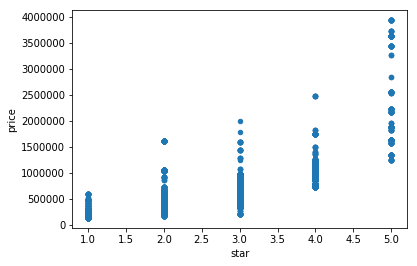

In [20]:
# mối quan hệ của star và price
ax = raw_data.plot.scatter(x='star',y='price')

# star càng cao dẫn đến giá càng cao

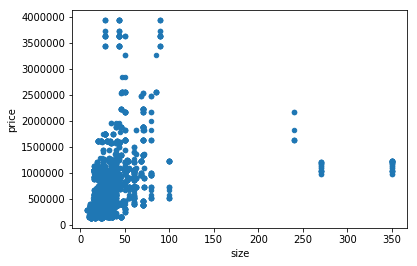

In [22]:
# mối quan hệ của size và price
ax = raw_data.plot.scatter(x='size',y='price')

Thử dự đoán mô hình với 2 tham số là star và size

In [83]:
# chia dữ liệu thành X và y
raw_X = raw_data[['size', 'star']].values
print(raw_X.shape)
raw_y = raw_data.price.values
print(raw_y.shape)

train_X, test_X, train_y, test_y = train_test_split(raw_X, raw_y, test_size=0.2, random_state=10)

from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(train_X)
# scaler.fit(test_X)

(5287, 2)
(5287,)


In [63]:
# Thử dự đoán bằng mô hình LR
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(train_X, train_y)
print('R2:', regressor.score(test_X,test_y))

R2: 0.5315889812624831


R2: 0.5509015795675333


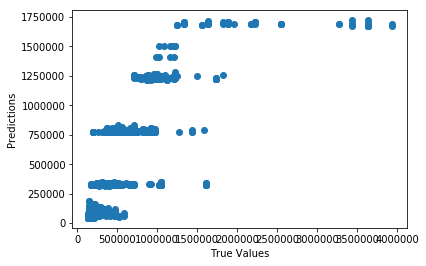

In [71]:
# Thử dự đoán bằng mô hình NN
from sklearn.neural_network import MLPRegressor
neural_net_model = MLPRegressor(hidden_layer_sizes=(10), activation="relu",
                                solver="lbfgs", max_iter=1000, random_state=0)
neural_net_model.fit(train_X, train_y)
print('R2:', neural_net_model.score(test_X, test_y))

import matplotlib.pyplot as plt
plt.scatter(test_y, neural_net_model.predict(test_X))
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# Kết quả cải thiện không đáng kể so với LR

Tìm hiểu các tham số khác

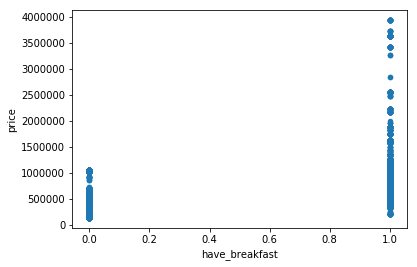

In [58]:
ax = raw_data.plot.scatter(x='have_breakfast',y='price')

# Nhận xét: Đa số có bửa sáng đều có giá cao

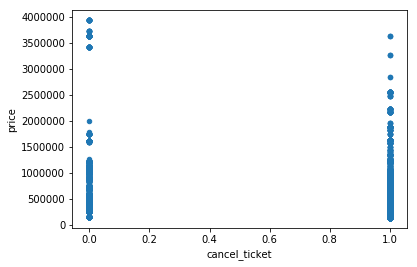

In [73]:
ax = raw_data.plot.scatter(x='cancel_ticket',y='price')

# có thể thấy tham số có hủy vé hay không không ảnh hưởng nhiều đến giá

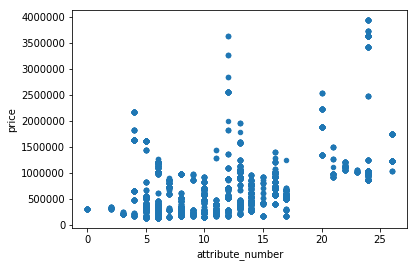

In [76]:
ax = raw_data.plot.scatter(x='attribute_number',y='price')

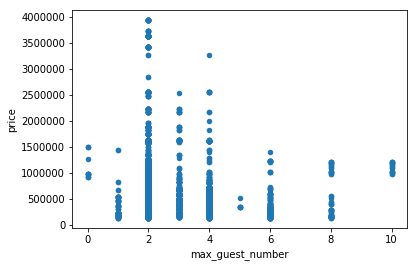

In [77]:
ax = raw_data.plot.scatter(x='max_guest_number',y='price')

In [84]:
# Thử thêm lần lượt các tham số khác và tính độ lỗi
add_features = [ 'have_breakfast', 'cancel_ticket', 'attribute_number', 'max_guest_number']

for i in range(0,len(add_features)):
    features = [ 'size', 'star']
    for j in range(0,i+1):
        features.append(add_features[j])
    
    raw_X = raw_data[features].values
    raw_y = raw_data.price.values

    train_X, test_X, train_y, test_y = train_test_split(raw_X, raw_y, test_size=0.2, random_state=10)
    #scaler = StandardScaler()
    #scaler.fit(train_X)
    #scaler.transform(test_X)

    neural_net_model = MLPRegressor(hidden_layer_sizes=(10), activation="relu",
                                solver="lbfgs", max_iter=1000, random_state=0)
    neural_net_model.fit(train_X, train_y)
    print('R2: ', neural_net_model.score(test_X, test_y))
    
# Kết quả đạt được khá tốt khi thêm 2 tham số 'have_breakfast' và 'cancel_ticket'

R2:  0.6012709877616862
R2:  0.8169272481924141
R2:  0.7860470726659291
R2:  0.8143834172918363
